In [9]:
import RNA
import numpy as np

import subprocess
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import SVG, display
from collections import Counter
from collections import defaultdict

import difflib
import sys
import os
import random
import string
import time

import helper

import pandas as pd

In [10]:
sequence = "AAAAUAAUGUACCGGACAUUCGCGCACGACCACCAUAUGGCAGAGCAUGU"
s1 = ".....(((((.....)))))...((.(..(((.....)))..).))...."
#          X             X
s2 = "......((((.....))))....((.(..(((.....)))..).))...."


i = -6
j = -20



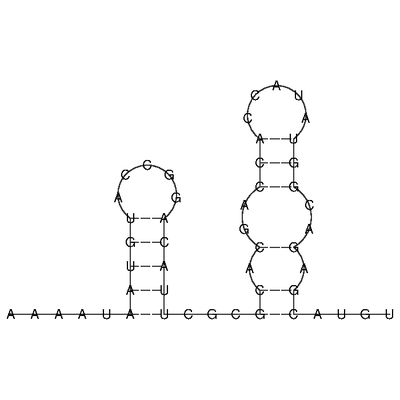

In [11]:
size = 400
helper.plot_layout(sequence, s1, layout=3, size=size)

In [12]:
fc = RNA.fold_compound(sequence)

en1 = fc.eval_structure(s1)
en2 = en1 + fc.eval_move(s1, i, j)
print (en1, en2)

en2 = fc.eval_structure(s2)
print (en1, en2)

-5.300000190734863 -4.600000202655792
-5.300000190734863 -4.599999904632568


In [35]:
pt1 = list(RNA.ptable(s1))
le = pt1.copy()

# different way to calculate initial energy in kcal/mol
for n in range(len(pt1)):
    if (pt1[n] == 0 or pt1[n] < n):
        le[n] = 0;
    else:
        le[n] = fc.eval_loop_pt(n, pt1)/100.0

en1 = sum(le)

print (pt1)
print (le)
print (sum(le))

old_loop = fc.eval_loop_pt(-i, pt1)/100.0

pt1[-i] = 0
pt1[-j] = 0

# to get en2, substract the old loop energy from en1
en2 = en1 - old_loop

print (fc.eval_structure_pt(pt1)/100)

print (en1, en2)

[50, 0, 0, 0, 0, 0, 20, 19, 18, 17, 16, 0, 0, 0, 0, 0, 10, 9, 8, 7, 6, 0, 0, 0, 46, 45, 0, 43, 0, 0, 40, 39, 38, 0, 0, 0, 0, 0, 32, 31, 30, 0, 0, 27, 0, 25, 24, 0, 0, 0, 0]
[-1.5, 0, 0, 0, 0, 0, -0.9, -1.1, -2.1, -2.2, 5.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3.4, 0.9, 0, -0.4, 0, 0, -3.3, -2.1, 5.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-5.300000000000001
100000.0
-5.300000000000001 -3.8000000000000007


In [47]:
# find enclosing bp 

#     for (j = l + 1; j <= len; j++) {
#         if (pt[j] <= 0) continue; /* unpaired */

#         if (pt[j] < k) break; /* found it */

#         if (pt[j] > j) {
#             j = pt[j]; /* skip substructure */

pt1 = list(RNA.ptable(s1))

i = -6
j = -20
i = 11
j = 15

en1 = fc.eval_structure(s1)
en2 = en1 + fc.eval_move(s1, i, j)
print (en1, en2)W

k = i if i>0 else -i
l = j if j>0 else -j

j = l+1

while (True):

    if j>=pt1[0]:
        break   
    if (pt1[j] <= 0):
        j += 1
        continue
    if (pt1[j] < k):
        break;
    if (pt1[j] > j):
        j = pt1[j]; 
    j += 1    
    
i = pt1[j] if (j <= pt1[0]) else 0;

print (i, k, l, j)

pt2 = pt1.copy()
pt2[k] = l
pt2[l] = k

new_loop1 = fc.eval_loop_pt(i, pt2)/100.0
print (new_loop1)

new_loop2 = fc.eval_loop_pt(k, pt2)/100.0
print (new_loop2)


-5.300000190734863 -5.5000001937150955
10 11 15 16
-0.9
5.9
